In [ ]:
! wget 'https://raw.githubusercontent.com/shyanne399/641_Project/main/Data/WASSA23_conv_level_with_labels_train.tsv'
! wget 'https://raw.githubusercontent.com/shyanne399/641_Project/main/Data/WASSA23_conv_level_dev.tsv'
! wget 'https://raw.githubusercontent.com/shyanne399/641_Project/main/Data/goldstandard_CONV_dev.tsv'

--2023-05-08 18:26:25--  https://raw.githubusercontent.com/shyanne399/641_Project/main/Data/WASSA23_conv_level_with_labels_train.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1217813 (1.2M) [text/plain]
Saving to: ‘WASSA23_conv_level_with_labels_train.tsv’

WASSA23_conv_level_ 100%[===================>]   1.16M  --.-KB/s    in 0.01s   

2023-05-08 18:26:25 (101 MB/s) - ‘WASSA23_conv_level_with_labels_train.tsv’ saved [1217813/1217813]

--2023-05-08 18:26:26--  https://raw.githubusercontent.com/shyanne399/641_Project/main/Data/WASSA23_conv_level_dev.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.1

In [ ]:
!pip install transformers torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.3 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt

# majority 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
train_rawdata = pd.read_table('/content/WASSA23_conv_level_with_labels_train.tsv')
test_rawdata = pd.read_table('/content/WASSA23_conv_level_dev.tsv')
column_name = ['EmotionalPolarity','Emotion','Empathy']
gold_standra = pd.read_table('/content/goldstandard_CONV_dev.tsv',names=column_name)

In [ ]:
# get dataset
test = pd.concat([test_rawdata['text'],gold_standra],axis=1)

In [ ]:
# find the most frequent class
pol_frequent = test['EmotionalPolarity'].mode()
emo_frequent = test['Emotion'].mode()
emp_frequent = test['Empathy'].mode()

In [ ]:
# count the numbers for each most frequent class
pol_majority = test['EmotionalPolarity'].value_counts()[pol_frequent].iloc[0]
emo_majority = test['Emotion'].value_counts()[emo_frequent].iloc[0]
emp_majority = test['Empathy'].value_counts()[emp_frequent].iloc[0]

In [ ]:
def Get_y_true(name):
  y_true = np.array(test[name].tolist())
  le = preprocessing.LabelEncoder()
  y_true_vector = le.fit_transform(y_true)
  return y_true_vector

In [ ]:
# matrices
y_pred = np.ones(test.shape[0])
# confusion_matrix
from sklearn.metrics import confusion_matrix,f1_score
y_pol_pred = pol_frequent[0] * np.ones(test.shape[0])
pol_cm = confusion_matrix(Get_y_true('EmotionalPolarity'), y_pol_pred)

y_emo_pred = emo_frequent[0] * np.ones(test.shape[0])
emo_cm = confusion_matrix(Get_y_true('Emotion'), y_emo_pred)

y_emp_pred = emp_frequent[0] * np.ones(test.shape[0])
emp_cm = confusion_matrix(Get_y_true('Empathy'), y_emp_pred)
print(f'the confusion matrix of emotionalpolarity is %s'%pol_cm)
print(f'the confusion matrix of emotion is %s'%emo_cm)
print(f'the confusion matrix of empathy is %s'%emp_cm)

the confusion matrix of emotionalpolarity is [[  0   0 164   0   0   0   0   0   0]
 [  0   0 131   0   0   0   0   0   0]
 [  0   0  16   0   0   0   0   0   0]
 [  0   0 233   0   0   0   0   0   0]
 [  0   0 473   0   0   0   0   0   0]
 [  0   0 336   0   0   0   0   0   0]
 [  0   0  10   0   0   0   0   0   0]
 [  0   0 353   0   0   0   0   0   0]
 [  0   0 684   0   0   0   0   0   0]]
the confusion matrix of emotion is [[  0   0   6   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  12   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  61   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 163   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 215   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 294   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 433   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 293   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 271   0   0   0   0   

In [ ]:
pd.DataFrame(y_pol_pred)[[0]]
train_rawdata[['EmotionalPolarity']]

,EmotionalPolarity
0,2.0000
1,2.0000
2,2.0000
3,0.6667
4,0.3333
...,...
8771,2.0000
8772,0.0000
8773,2.0000
8774,2.0000


In [ ]:
# f1_score
pol_f1 = f1_score(Get_y_true('EmotionalPolarity'), y_pol_pred, average='micro')
emo_f1 = f1_score(Get_y_true('Emotion'), y_emo_pred, average='micro')
emp_f1 = f1_score(Get_y_true('Empathy'), y_emp_pred, average='micro')
print(f'the f1 score of emotionalpolarity is %s'%pol_f1)
print(f'the f1 score of emotion is %s'%emo_f1)
print(f'the f1 score of empathy is %s'%emp_f1)

the f1 score of emotionalpolarity is 0.006666666666666668
the f1 score of emotion is 0.025416666666666667
the f1 score of empathy is 0.065


In [ ]:
# accuracy 
acc_pol = pol_majority / test.shape[0]
acc_emo = emo_majority / test.shape[0]
acc_emp = emp_majority / test.shape[0]
print(f'the accuarcy of emotionalpolarity is %s'%acc_pol)
print(f'the accuarcy of emotion is %s'%acc_emo)
print(f'the accuarcy of empathy is %s'%acc_emp)

the accuarcy of emotionalpolarity is 0.285
the accuarcy of emotion is 0.18041666666666667
the accuarcy of empathy is 0.15333333333333332


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


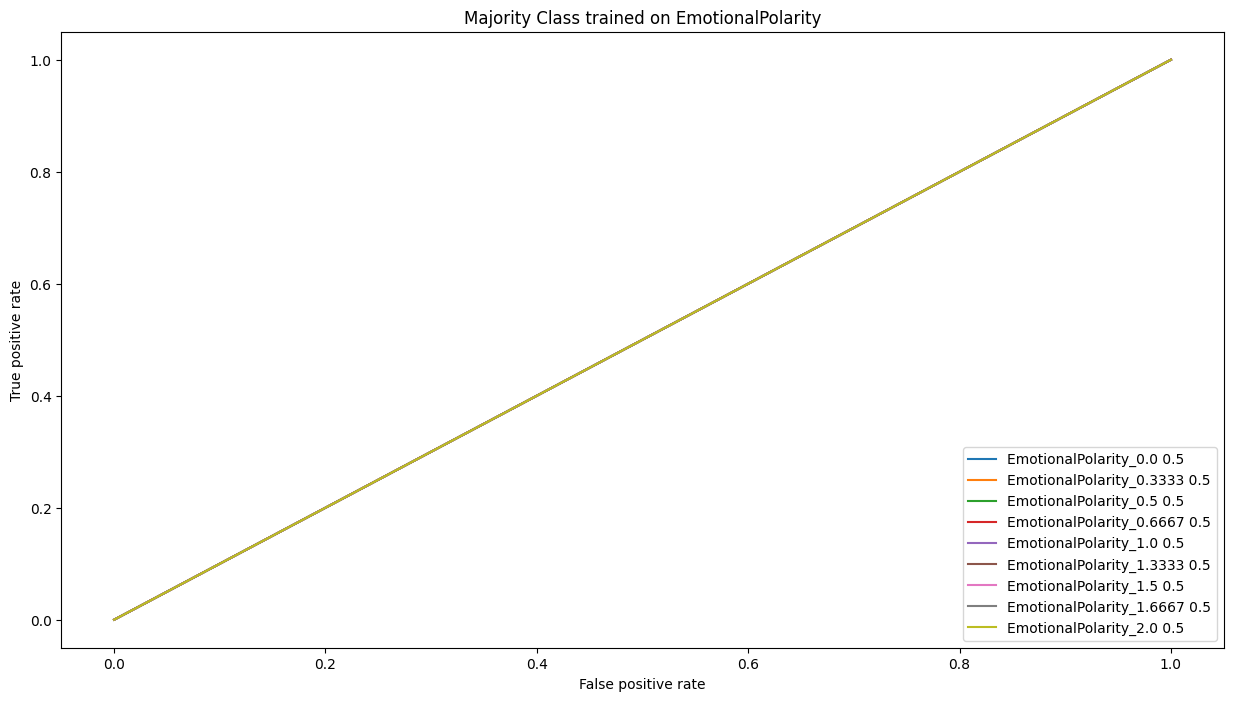

In [ ]:
# ROC
# EmotionalPolarity
ohe_pol_maj = OneHotEncoder()
ohe_pol_maj.fit(train_rawdata[['EmotionalPolarity']])

ohe_pol_maj_true = ohe_pol_maj.transform(test[['EmotionalPolarity']]).toarray()
ohe_pol_maj_pred = ohe_pol_maj.transform(pd.DataFrame(y_pol_pred)[[0]]).toarray()

plt.figure(figsize=(15,8))
for i, label in enumerate(ohe_pol_maj.get_feature_names_out()):
  fpr, tpr, _ = metrics.roc_curve(
      ohe_pol_maj_true[:,i].astype(float), ohe_pol_maj_pred[:,i]
  )
  auc = metrics.roc_auc_score(
      ohe_pol_maj_true[:,i].astype(float), ohe_pol_maj_pred[:,i]
  )
  plt.plot(fpr, tpr, label="%s %g" %(label, auc))
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.legend(loc="lower right")
  plt.title("Majority Class trained on EmotionalPolarity")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


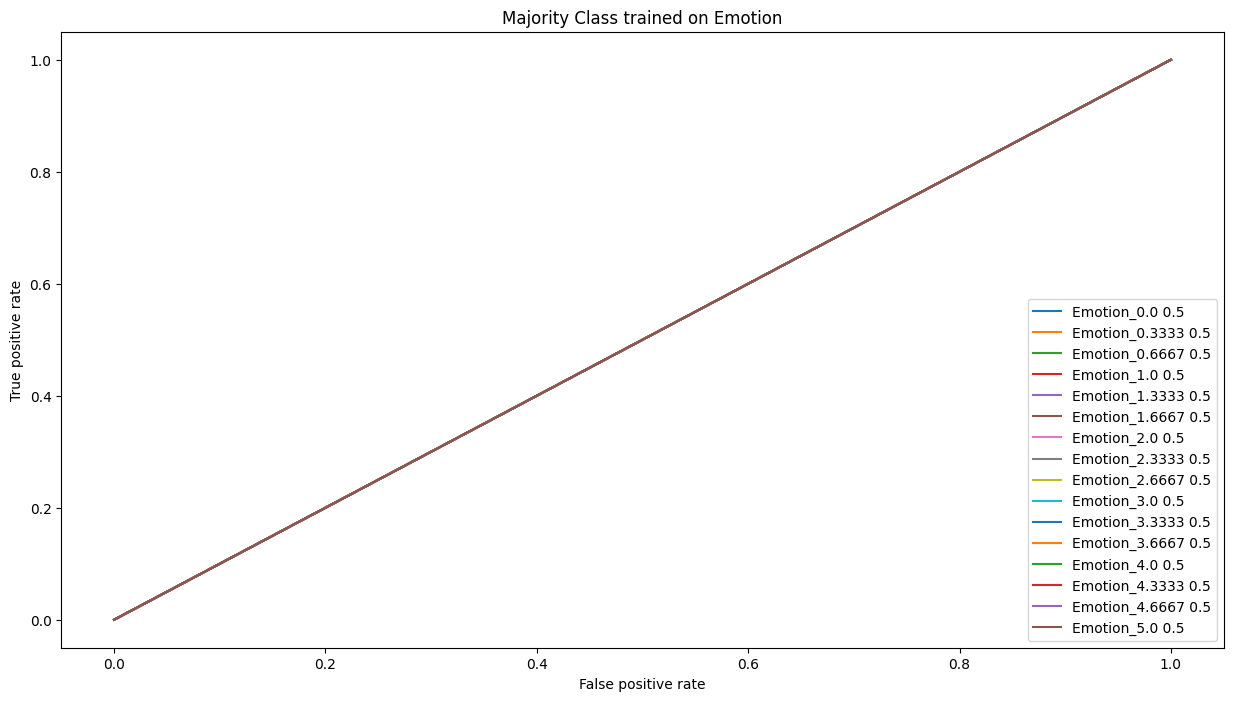

In [ ]:
# ROC
# Emotion
ohe_pol_maj = OneHotEncoder()
ohe_pol_maj.fit(train_rawdata[['Emotion']])

ohe_pol_maj_true = ohe_pol_maj.transform(test[['Emotion']]).toarray()
ohe_pol_maj_pred = ohe_pol_maj.transform(pd.DataFrame(y_pol_pred)[[0]]).toarray()

plt.figure(figsize=(15,8))
for i, label in enumerate(ohe_pol_maj.get_feature_names_out()):
  fpr, tpr, _ = metrics.roc_curve(
      ohe_pol_maj_true[:,i].astype(float), ohe_pol_maj_pred[:,i]
  )
  auc = metrics.roc_auc_score(
      ohe_pol_maj_true[:,i].astype(float), ohe_pol_maj_pred[:,i]
  )
  plt.plot(fpr, tpr, label="%s %g" %(label, auc))
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.legend(loc="lower right")
  plt.title("Majority Class trained on Emotion")

In [ ]:
ohe_pol_maj_true.shape

(2400, 9)

In [ ]:
ohe_pol_maj_pred.shape

(2400, 9)

# one-vs-rest + lg

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(train_rawdata['text'])

# dataset function
def DataSet(X,y):
  # convert train_x
  text_list = X.tolist()
  X_vector = vectorizer.transform(text_list)
  X_vector.toarray()

  # convert train_y
  le = preprocessing.LabelEncoder()
  y_vector = le.fit_transform(y)
  return X_vector, y_vector

In [ ]:
# get train dataset for EmotionalPolarity
train_pol_x, train_pol_y = DataSet(train_rawdata['text'],train_rawdata['EmotionalPolarity'])
test_pol_x, test_pol_y = DataSet(test['text'],test['EmotionalPolarity'])

# get train dataset for Emotion
train_emo_x, train_emo_y = DataSet(train_rawdata['text'],train_rawdata['Emotion'])
test_emo_x, test_emo_y = DataSet(test['text'],test['Emotion'])

# get train dataset for Empathy
train_emp_x, train_emp_y = DataSet(train_rawdata['text'],train_rawdata['Empathy'])
test_emp_x, test_emp_y = DataSet(test['text'],test['Empathy'])

In [ ]:
test_pol_y

array([4, 8, 8, ..., 8, 8, 8])

In [ ]:
# EmotionalPolarity model
clf_pol = OneVsRestClassifier(SVC()).fit(train_pol_x, train_pol_y)

clf_emo = OneVsRestClassifier(SVC()).fit(train_emo_x, train_emo_y)

clf_emp = OneVsRestClassifier(SVC()).fit(train_emp_x, train_emp_y)

In [ ]:
# accuracy
# test data
pred_pol = clf_pol.predict(test_pol_x)
acc_pol_oneVsRest = np.sum(test_pol_y == pred_pol)/test_pol_x.shape[0]

pred_emo = clf_emo.predict(test_emo_x)
acc_emo_oneVsRest = np.sum(test_emo_y == pred_emo)/test_emo_x.shape[0]

pred_emp = clf_emp.predict(test_emp_x)
acc_emp_oneVsRest = np.sum(test_emp_y == pred_emp)/test_emp_x.shape[0]

print(f'the accuarcy of emotionalpolarity is %s'%acc_pol_oneVsRest)
print(f'the accuarcy of emotion is %s'%acc_emo_oneVsRest)
print(f'the accuarcy of empathy is %s'%acc_emp_oneVsRest)

the accuarcy of emotionalpolarity is 0.3858333333333333
the accuarcy of emotion is 0.205
the accuarcy of empathy is 0.18541666666666667


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix

In [ ]:
# confusion metric
pol_cm2 = confusion_matrix(test_pol_y, pred_pol)
emo_cm2 = confusion_matrix(test_emo_y, pred_emo)
emp_cm2 = confusion_matrix(test_emp_y, pred_emp)
print(f'the confusion matrix of emotionalpolarity is %s'%pol_cm2)
print(f'the confusion matrix of emotion is %s'%emo_cm2)
print(f'the confusion matrix of empathy is %s'%emp_cm2)

the confusion matrix of emotionalpolarity is [[ 46  10   1   4  37  14   0  10  42]
 [ 28   0   0   8  43  14   0  12  26]
 [  1   1   0   1   8   1   0   1   3]
 [ 22   3   0   5  89  18   0  35  61]
 [ 14   3   0  11 247  35   0  48 115]
 [  6   2   0   4  83  23   0  36 182]
 [  0   0   0   0   0   1   0   3   6]
 [  5   1   0   3  64  25   0  36 219]
 [  2   1   0   1  40  23   0  48 569]]
the confusion matrix of emotion is [[  0   0   0   3   2   0   1   0   0   0   0   0   0   0   0   0]
 [  0   1   1   8   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   7   4  26   4   8   4   3   2   1   0   0   0   0   2   0]
 [  0   4  11  71  21  21  19   8   3   3   2   0   0   0   0   0]
 [  0   0   1  27  29  47  74  24   9   2   1   1   0   0   0   0]
 [  0   0   2  18  30  52 104  56  22   5   4   1   0   0   0   0]
 [  0   1   2  12  35  66 170  77  43  13  12   1   1   0   0   0]
 [  1   1   1   8   9  33 118  62  32  13   9   5   1   0   0   0]
 [  0   0   0   4   2  21  84  8

In [ ]:
test_pol_y

array([4, 8, 8, ..., 8, 8, 8])

In [ ]:
# f1_score
pol_f1_2 = f1_score(test_pol_y, pred_pol, average='micro')
emo_f1_2 = f1_score(test_emo_y, pred_emo, average='micro')
emp_f1_2 = f1_score(test_emp_y, pred_emp, average='micro')
print(f'the f1 score of emotionalpolarity is %s'%pol_f1_2)
print(f'the f1 score of emotion is %s'%emo_f1_2)
print(f'the f1 score of empathy is %s'%emp_f1_2)

the f1 score of emotionalpolarity is 0.3858333333333333
the f1 score of emotion is 0.205
the f1 score of empathy is 0.18541666666666667


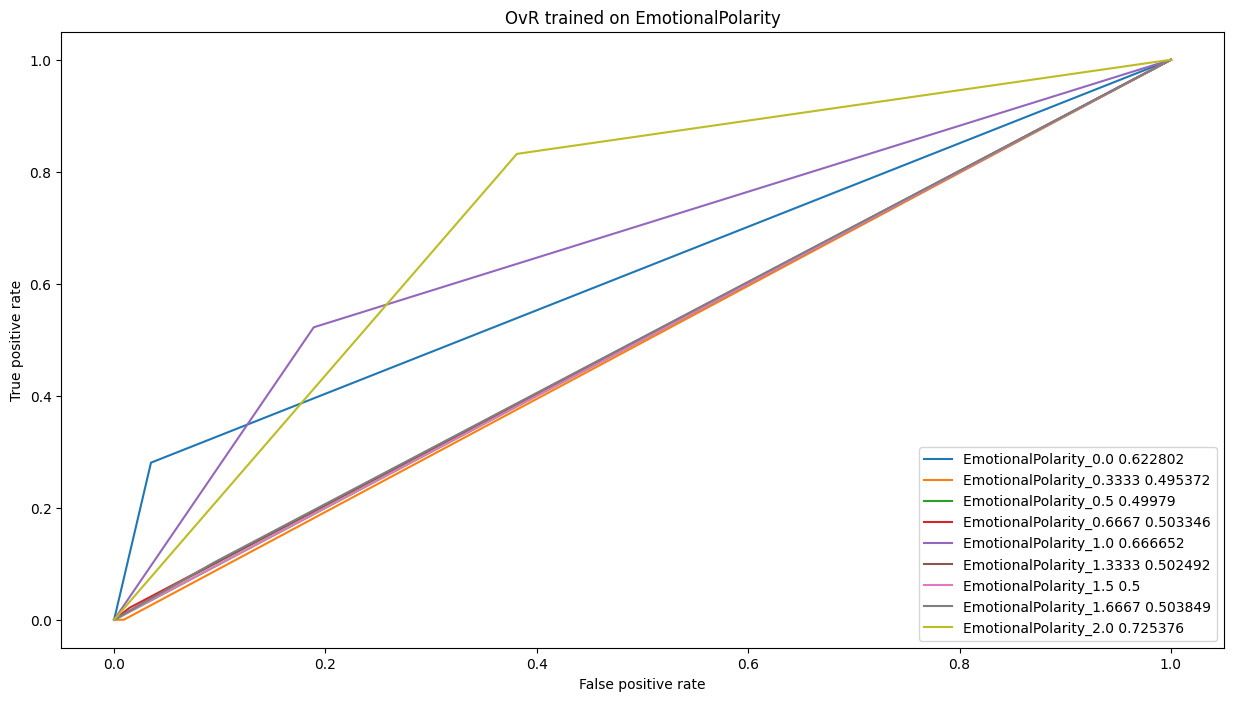

In [ ]:
## ROC
# EmotionalPolarity
ohe_pol = OneHotEncoder()
ohe_pol.fit(train_rawdata[['EmotionalPolarity']])

le_pol = LabelEncoder()
le_pol.fit(train_rawdata['EmotionalPolarity'])

_pol_true_df_pol = pd.DataFrame(le_pol.inverse_transform(test_pol_y), columns=["EmotionalPolarity"])
_pred_df_pol = pd.DataFrame(le_pol.inverse_transform(pred_pol), columns=["EmotionalPolarity"])
final_pr_pol = ohe_pol.transform(_pred_df_pol).toarray()
labels_pol = ohe_pol.transform(_pol_true_df_pol).toarray()

plt.figure(figsize=(15,8))
for i, label in enumerate(ohe_pol.get_feature_names_out()):
  fpr, tpr, _ = metrics.roc_curve(
      labels_pol[:,i].astype(float), final_pr_pol[:,i]
  )
  auc = metrics.roc_auc_score(
      labels_pol[:,i].astype(float), final_pr_pol[:,i]
  )
  plt.plot(fpr, tpr, label="%s %g" %(label, auc))
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.legend(loc="lower right")
  plt.title("OvR trained on EmotionalPolarity")

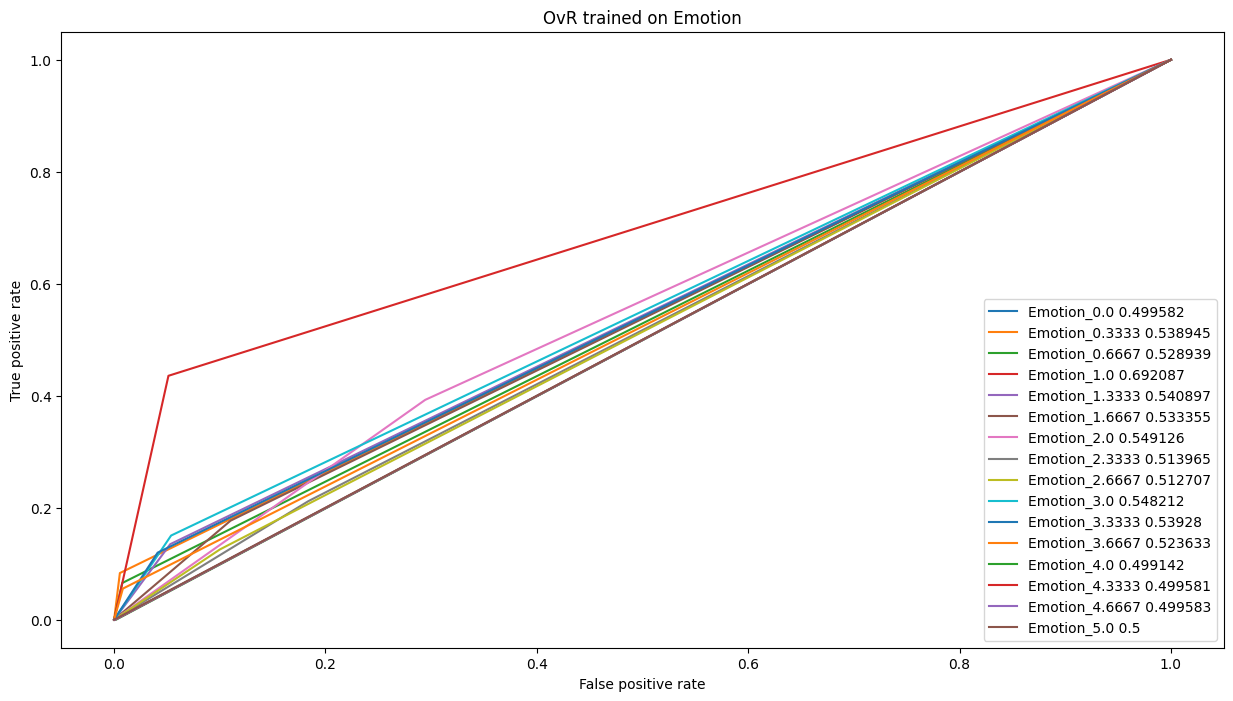

In [ ]:
## ROC
# Emotion
ohe_emo = OneHotEncoder()
ohe_emo.fit(train_rawdata[['Emotion']])

le_emo = LabelEncoder()
le_emo.fit(train_rawdata['Emotion'])

_pol_true_df_emo = pd.DataFrame(le_emo.inverse_transform(test_emo_y), columns=["Emotion"])
_pred_df_emo = pd.DataFrame(le_emo.inverse_transform(pred_emo), columns=["Emotion"])
final_pr_emo = ohe_emo.transform(_pred_df_emo).toarray()
labels_emo = ohe_emo.transform(_pol_true_df_emo).toarray()

plt.figure(figsize=(15,8))
for i, label in enumerate(ohe_emo.get_feature_names_out()):
  fpr, tpr, _ = metrics.roc_curve(
      labels_emo[:,i].astype(float), final_pr_emo[:,i]
  )
  auc = metrics.roc_auc_score(
      labels_emo[:,i].astype(float), final_pr_emo[:,i]
  )
  plt.plot(fpr, tpr, label="%s %g" %(label, auc))
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.legend(loc="lower right")
  plt.title("OvR trained on Emotion")

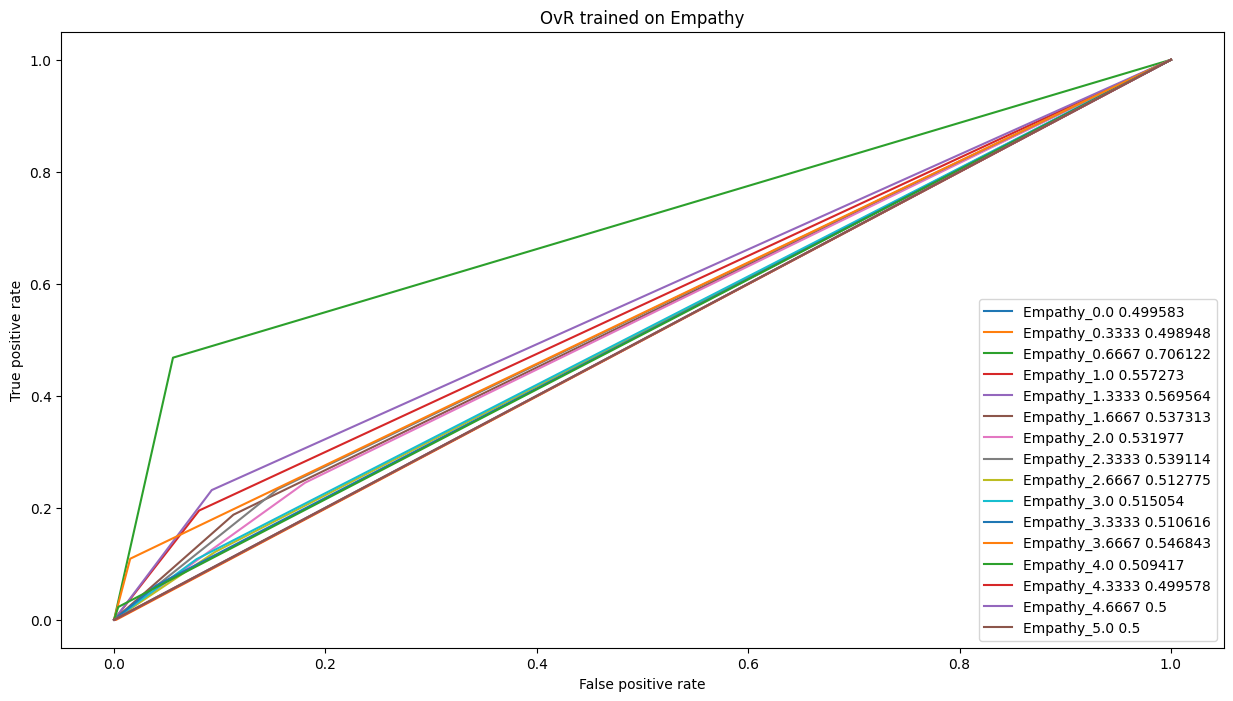

In [ ]:
# Empathy
ohe_emp = OneHotEncoder()
ohe_emp.fit(train_rawdata[['Empathy']])

le_emp = LabelEncoder()
le_emp.fit(train_rawdata['Empathy'])

_emp_true_df_emp = pd.DataFrame(le_emp.inverse_transform(test_emp_y), columns=["Empathy"])
_pred_df_emp = pd.DataFrame(le_emp.inverse_transform(pred_emp), columns=["Empathy"])
final_pr_emp = ohe_emp.transform(_pred_df_emp).toarray()
labels_emp = ohe_emp.transform(_emp_true_df_emp).toarray()

plt.figure(figsize=(15,8))
for i, label in enumerate(ohe_emp.get_feature_names_out()):
  fpr, tpr, _ = metrics.roc_curve(
      labels_emp[:,i].astype(float), final_pr_emp[:,i]
  )
  auc = metrics.roc_auc_score(
      labels_emp[:,i].astype(float), final_pr_emp[:,i]
  )
  plt.plot(fpr, tpr, label="%s %g" %(label, auc))
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.legend(loc="lower right")
  plt.title("OvR trained on Empathy")

# plot

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# test.boxplot(column = 'EmotionalPolarity')
test['EmotionalPolarity'].plot.hist()

In [ ]:
test['Emotion'].plot.hist()

In [ ]:
test['Emotion'].value_counts()

In [ ]:
test['Empathy'].plot.hist()

In [ ]:
from math import sqrt
to_round = 4
def pearsonr(x, y):
	"""
	Calculates a Pearson correlation coefficient. 
	"""

	assert len(x) == len(y), 'Prediction and gold standard does not have the same length...'

	xm = sum(x)/len(x)
	ym = sum(y)/len(y)

	xn = [k-xm for k in x]
	yn = [k-ym for k in y]

	r = 0 
	r_den_x = 0
	r_den_y = 0
	for xn_val, yn_val in zip(xn, yn):
		r += xn_val*yn_val
		r_den_x += xn_val*xn_val
		r_den_y += yn_val*yn_val

	r_den = sqrt(r_den_x*r_den_y)

	if r_den:
		r = r / r_den
	else:
		r = 0

	# Presumably, if abs(r) > 1, then it is only some small artifact of floating
	# point arithmetic.
	r = max(min(r, 1.0), -1.0)

	return round(r,to_round)

def calculate_pearson(gold, prediction):
	"""
	gold/prediction are a list of lists [ emp pred , distress pred ]
	"""

	# converting to float
	gold = [float(k) for k in gold]
	prediction = [float(k) for k in prediction]

	return pearsonr(gold, prediction)

In [ ]:
pearson_pol = pearsonr(test_pol_y, pred_pol)
pearson_emo = pearsonr(test_emo_y, pred_emo)
pearson_emp = pearsonr(test_emp_y, pred_emp)

In [ ]:
pearson_pol

0.5074

In [ ]:
pearson_emo

0.5115

In [ ]:
pearson_emp

0.516